In [93]:
import numpy as np
from datascience import *
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [94]:
video_games = Table.read_table('businessl.csv')
video_games

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,nan
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,nan
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,nan
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,01st May 19
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,nan
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,nan
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,29th Mar 19
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,nan
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,nan
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,nan


In [95]:
video_games.num_rows

62748

In [96]:
def remove_unit(string):
    return string.replace('m','')
remove_unit('100m')

'100'

In [97]:
business = video_games.with_column('Total Sales(millions)', video_games.apply(remove_unit,'Total Sales').astype(float))
business

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Total Sales(millions)
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,nan,0.11
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,nan,0.07
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,nan,0.02
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,01st May 19,0
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,nan,0.16
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,nan,0.03
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,29th Mar 19,0
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,nan,0
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,nan,0
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,nan,0.01


In [6]:
business.column('Total Sales(millions)')

array([ 0.11,  0.07,  0.02, ...,   nan,   nan,   nan])

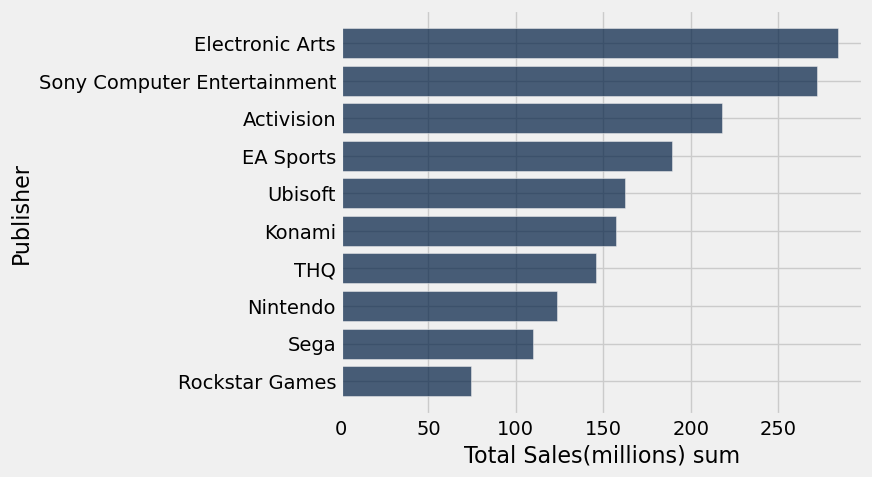

In [7]:
business.select('Publisher', 'Total Sales(millions)').group('Publisher',sum).sort(1,descending = True).take(np.arange(1,11)).barh('Publisher')

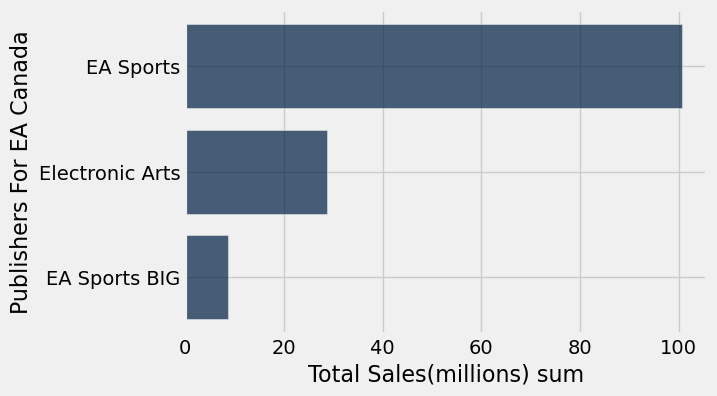

In [86]:
business.where('Developer',are.equal_to('EA Canada'
                                       )).select('Publisher', 'Total Sales(millions)'
                                                ).group('Publisher',sum
                                                       ).sort(1,descending = True
                                                             ).take(np.arange(3)
                                                                   ).barh('Publisher')
plt.ylabel('Publishers For EA Canada');


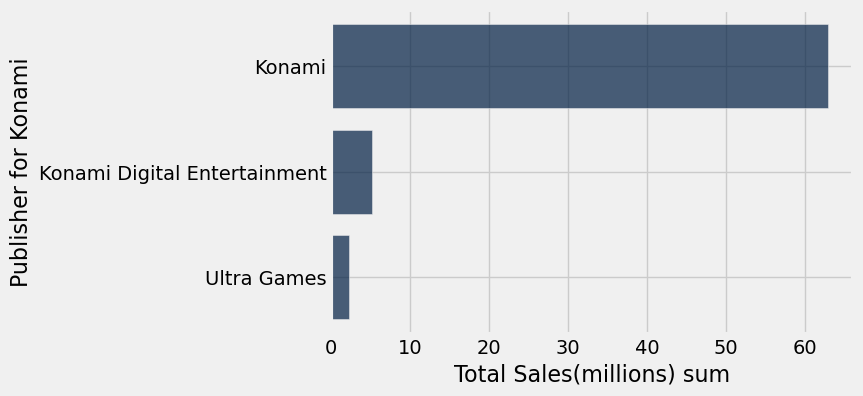

In [87]:
business.where('Developer',are.equal_to('Konami'
                                       )).select('Publisher', 'Total Sales(millions)'
                                                ).group('Publisher',sum
                                                       ).sort(1,descending = True
                                                             ).take(np.arange(3)
                                                                   ).barh('Publisher')
plt.ylabel('Publisher for Konami');

In [ ]:
business.where('Publisher',are.equal_to('Electronic Arts'
                                       )).select('Developer', 'Total Sales(millions)'
                                                ).group('Publisher',sum
                                                       ).sort(1,descending = True
                                                             ).take(np.arange(3)
                                                                   ).barh('Publisher')
plt.ylabel('Publisher for Konami');

In [9]:
group=business.select('Developer', 'Total Sales(millions)').group('Developer',sum).sort(1,descending = True)
group

Developer,Total Sales(millions) sum
nan,nan
EA Canada,138.03
Konami,71.83
Namco,61.34
EA Tiburon,55.19
Capcom,41.91
Traveller's Tales,41.27
Ubisoft,36.02
Konami Computer Entertainment Tokyo,35.03
Treyarch,32.38


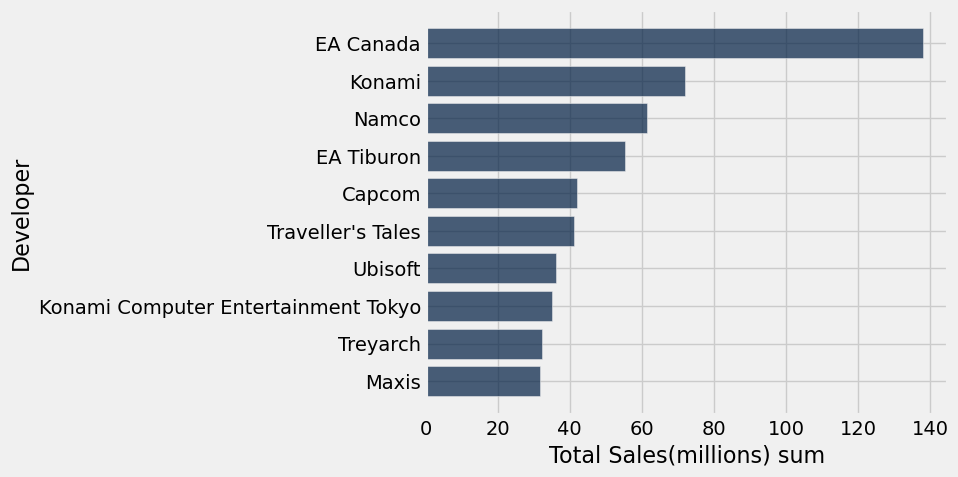

In [10]:


business.select('Developer', 'Total Sales(millions)').group('Developer',sum).sort(1,descending = True).take(np.arange(1,11)).barh('Developer')

In [11]:
business.select('Developer', 'Total Sales(millions)').group('Developer',sum)

Developer,Total Sales(millions) sum
07th Expansion,0.18
0verflow,0.02
10tacle Studios AG,0.19
1C Company,0
1C Company / Avalon Style,0
1C Maddox Games,0.01
1C: Maddox Games,0.11
1C:Ino-Co,0.08
1st Playable,0.07
1st Playable Productions,10.01


In [12]:
business.where('Developer',are.equal_to('EA Canada')).sort(1,descending = True)

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Total Sales(millions)
NHL 17,XOne_b,EA Sports,EA Canada,nan,nan,nan,nan,0.60m,0.52m,0.01m,nan,0.06m,13th Sep 16,nan,0.6
NHL 11,X360_b,EA Sports,EA Canada,nan,8.8,nan,nan,0.73m,0.61m,0.07m,nan,0.05m,07th Sep 10,nan,0.73
NBA Live 09,X360_b,Electronic Arts,EA Canada,nan,nan,nan,nan,0.72m,0.51m,0.14m,0.00m,0.07m,07th Oct 08,nan,0.72
NHL 12,X360_b,EA Sports,EA Canada,9,8.8,nan,nan,0.70m,0.55m,0.10m,nan,0.05m,13th Sep 11,nan,0.7
NHL 13,X360_b,Electronic Arts,EA Canada,nan,8.2,nan,nan,0.68m,0.51m,0.11m,nan,0.06m,11th Sep 12,21st Mar 18,0.68
NHL 10,X360_b,EA Sports,EA Canada,8.6,9.1,nan,nan,0.66m,0.51m,0.10m,nan,0.06m,15th Sep 09,nan,0.66
NHL 09,X360_b,Electronic Arts,EA Canada,nan,9,nan,nan,0.50m,0.45m,0.01m,nan,0.04m,09th Sep 08,nan,0.5
FIFA Street 3,X360_b,EA Sports BIG,EA Canada,nan,nan,nan,nan,0.34m,0.17m,0.14m,nan,0.04m,18th Feb 08,nan,0.34
NHL 07,X360_b,EA Sports,EA Canada,nan,8,nan,nan,0.27m,0.25m,0.00m,nan,0.02m,12th Sep 06,nan,0.27
FaceBreaker,X360_b,EA Sports,EA Canada,nan,nan,nan,nan,0.19m,0.15m,0.02m,nan,0.01m,03rd Sep 08,nan,0.19


*HISTORICAL*

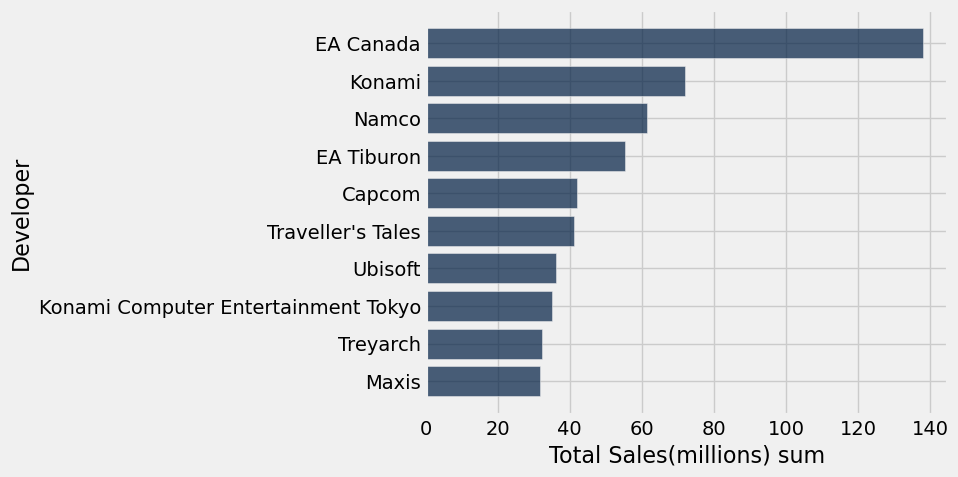

In [13]:
business.select('Developer', 'Total Sales(millions)').group('Developer',sum).sort(1,descending = True).take(np.arange(1,11)).barh('Developer')

In [14]:
years = Table.read_table('businesslwithyear.csv')
years

C:\Users\Betsy I George\anaconda3\Lib\site-packages\datascience\tables.py:163: DtypeWarning: Columns (0,1,2,3,8,9,10,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(filepath_or_buffer, *args, **vargs)


Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Year,Last Update
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,7,nan
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,7,nan
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,8,nan
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,14,01st May 19
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,9,nan
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,7,nan
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,9,29th Mar 19
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,4,nan
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,9,nan
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,1,nan


In [74]:
def year(year):
    if year > 23:
        return 1900+ year
    elif year > 9:
        return 2000 + year
    else:
        return 2000 +year
year(3)

2003

In [75]:
actual_years = years.with_column('Actual Year', years.apply(year, 'Year'))
actual_years

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Year,Last Update,Actual Year
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,7,nan,2007
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,7,nan,2007
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,8,nan,2008
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,14,01st May 19,2014
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,9,nan,2009
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,7,nan,2007
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,9,29th Mar 19,2009
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,4,nan,2004
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,9,nan,2009
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,1,nan,2001


In [77]:
history = business.select('Developer', 'Total Sales(millions)'
               ).with_column('Actual Year',actual_years.take(np.arange(62748)).column('Actual Year')).where('Developer' , are.contained_in(group.take(np.arange(1,6)).column('Developer'))
                                                                                                           ).where('Actual Year', are.contained_in(np.arange(1996,2019)))
history

Developer,Total Sales(millions),Actual Year
Capcom,1.29,2003
Capcom,1.04,1997
Capcom,1,1998
Capcom,0.99,2008
Capcom,0.95,2007
Capcom,0.93,2005
Capcom,0.88,1997
Capcom,0.85,1996
Capcom,0.83,1998
Capcom,0.78,2000


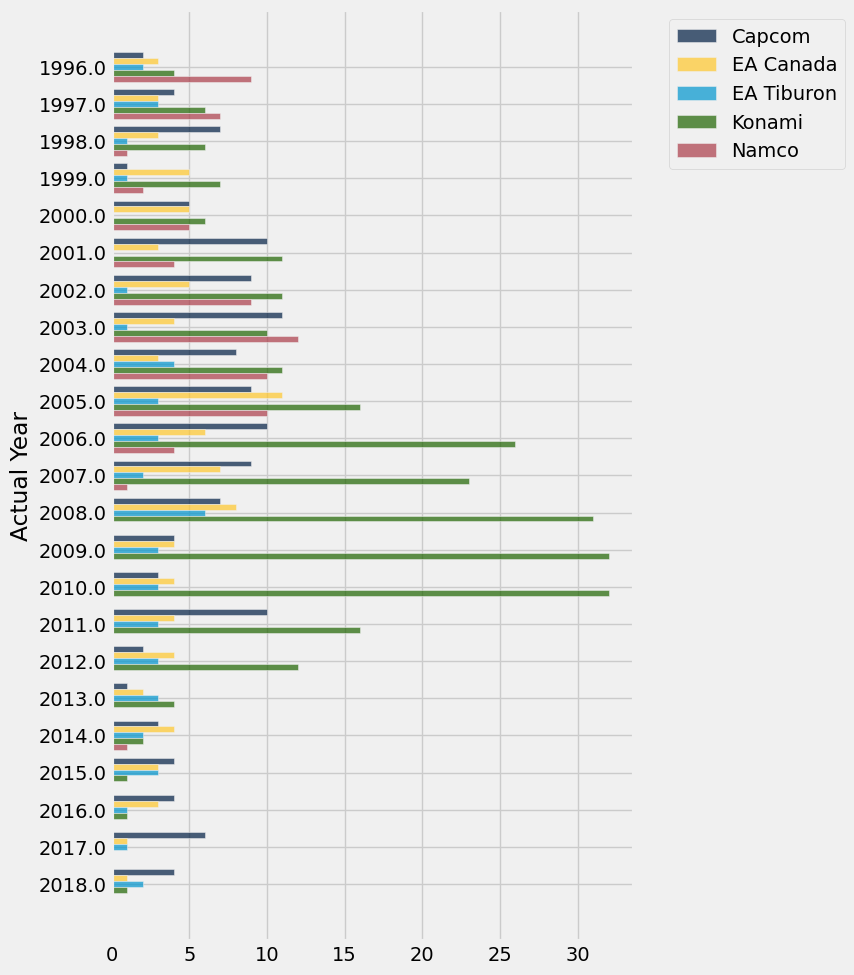

In [78]:
history.pivot("Developer","Actual Year").barh('Actual Year')

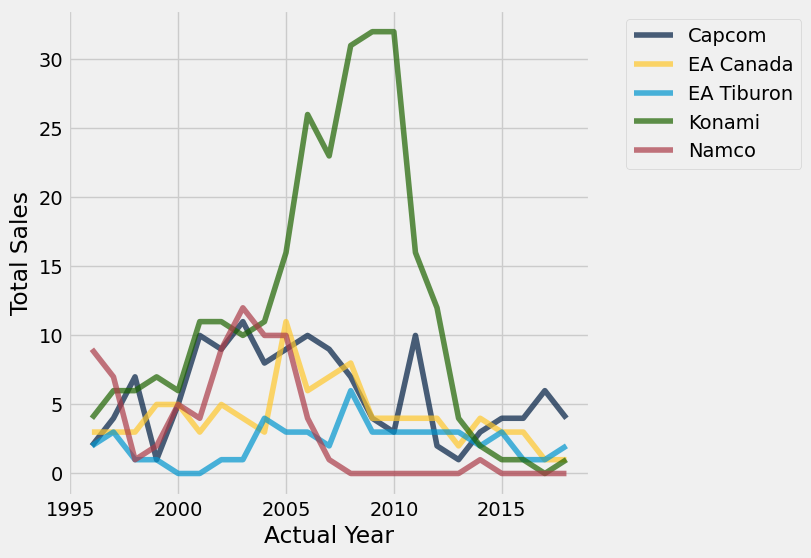

In [84]:
history.pivot("Developer","Actual Year").plot('Actual Year')
plt.ylabel('Total Sales');

In [51]:
business.group('Console').sort(1,descending = True).take(np.arange(1,11)).column('Console')


array(['DS_b', 'PS2_b', 'PC_b', 'Wii_b', 'PSP_b', 'PS_b', 'GBA_b', 'PS3_b',
       '3DS_b', 'PSV_b'],
      dtype='<U6')

In [54]:
factor = business.where('Console' , are.contained_in(business.group('Console').sort(1,descending = True).take(np.arange(1,11)).column('Console')))
factor

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Total Sales(millions)
Higurashi no Naku Koro ni Matsuri,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.11m,nan,nan,0.11m,nan,22nd Feb 07,nan,0.11
Higurashi no Naku Koro ni Matsuri: Kakera Asobi,PS2_b,Alchemist,07th Expansion,nan,nan,nan,nan,0.07m,nan,nan,0.07m,nan,20th Dec 07,nan,0.07
School Days LxH,PS2_b,Interchannel,0verflow,nan,nan,nan,nan,0.02m,nan,nan,0.02m,nan,17th Jan 08,nan,0.02
Island Days,3DS_b,Stack,0verflow,nan,nan,nan,nan,0.00m,nan,nan,0.00m,nan,03rd Jul 14,01st May 19,0
Ready 2 Rumble Revolution,Wii_b,Atari,10tacle Studios AG,nan,3.1,nan,nan,0.16m,0.15m,0.00m,nan,0.01m,17th Mar 09,nan,0.16
Boulder Dash: Rocks!,DS_b,10TACLE Studios,10tacle Studios AG,nan,nan,nan,nan,0.03m,nan,0.03m,nan,0.00m,23rd Nov 07,nan,0.03
Men of War: Red Tide,PC_b,Aspyr,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,02nd Nov 09,29th Mar 19,0
Perimeter,PC_b,Codemasters,1C Company,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,30th Jun 04,nan,0
4x4 Hummer,PC_b,Aspyr,1C Company / Avalon Style,nan,nan,nan,nan,0.00m,nan,0.00m,nan,0.00m,15th Jun 09,nan,0
IL-2 Sturmovik,PC_b,Ubisoft,1C Maddox Games,nan,nan,nan,nan,0.01m,nan,0.01m,nan,0.00m,18th Nov 01,nan,0.01


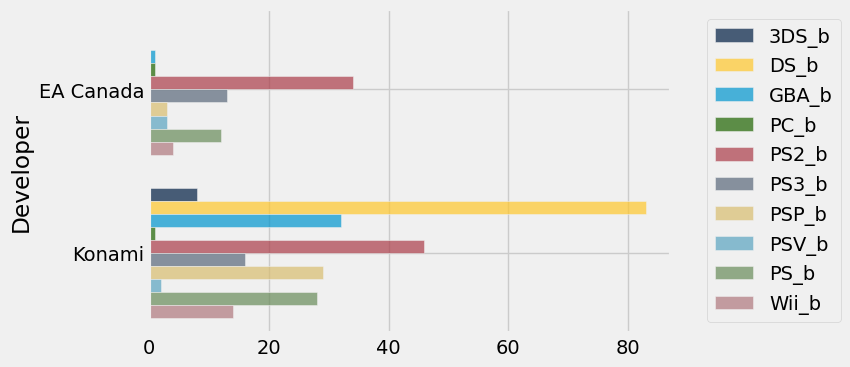

In [72]:
factor.pivot('Console','Developer').where(
    'Developer', are.contained_in( 
        business.select('Developer', 'Total Sales(millions)').group('Developer',sum).sort(1,descending = True).take(np.arange(1,3)).column(0))).barh('Developer')

In [89]:
video_game = Table.read_table('business.csv')
video_game

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update
Tetris,Series_b,The Tetris Company,Alexey Pajitnov,nan,nan,nan,496.40m,nan,nan,nan,nan,nan,01st Jan 88,27th Feb 20
Pokemon,Series_b,Nintendo,Game Freak,nan,nan,nan,480.66m,nan,nan,nan,nan,nan,28th Sep 98,03rd Feb 20
Call of Duty,Series_b,Activision,Infinity Ward,nan,nan,nan,425.00m,nan,nan,nan,nan,nan,29th Oct 03,03rd Feb 20
Grand Theft Auto,Series_b,Rockstar Games,Rockstar North,nan,nan,nan,405.00m,nan,nan,nan,nan,nan,27th Mar 98,03rd Feb 20
Super Mario,Series_b,Nintendo,Nintendo,nan,nan,nan,402.36m,nan,nan,nan,nan,nan,20th Jul 83,20th Feb 20
FIFA,Series_b,EA Sports,Extended Play Productions (1991-1997),nan,nan,nan,325.00m,nan,nan,nan,nan,nan,15th Dec 93,03rd Feb 20
Minecraft,Series_b,Mojang,Mojang,nan,nan,nan,238.00m,nan,nan,nan,nan,nan,18th Nov 11,08th Feb 20
Minecraft,All_b,Mojang,Mojang AB,nan,nan,nan,238.00m,nan,nan,nan,nan,nan,18th Nov 11,08th Oct 20
Lego,Series_b,Warner Bros. Interactive Entertainment,TT Fusion,nan,nan,nan,203.22m,nan,nan,nan,nan,nan,26th Sep 97,01st Mar 20
Assassin's Creed,Series_b,Ubisoft,Ubisoft,nan,nan,nan,200.00m,nan,nan,nan,nan,nan,13th Nov 07,11th Feb 20


In [102]:
shipped = video_game.with_column('Total Shipped (m)', video_game.apply(remove_unit,'Total Shipped').astype(float))
shipped

Game,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,Total Shipped (m)
Tetris,Series_b,The Tetris Company,Alexey Pajitnov,nan,nan,nan,496.40m,nan,nan,nan,nan,nan,01st Jan 88,27th Feb 20,496.4
Pokemon,Series_b,Nintendo,Game Freak,nan,nan,nan,480.66m,nan,nan,nan,nan,nan,28th Sep 98,03rd Feb 20,480.66
Call of Duty,Series_b,Activision,Infinity Ward,nan,nan,nan,425.00m,nan,nan,nan,nan,nan,29th Oct 03,03rd Feb 20,425
Grand Theft Auto,Series_b,Rockstar Games,Rockstar North,nan,nan,nan,405.00m,nan,nan,nan,nan,nan,27th Mar 98,03rd Feb 20,405
Super Mario,Series_b,Nintendo,Nintendo,nan,nan,nan,402.36m,nan,nan,nan,nan,nan,20th Jul 83,20th Feb 20,402.36
FIFA,Series_b,EA Sports,Extended Play Productions (1991-1997),nan,nan,nan,325.00m,nan,nan,nan,nan,nan,15th Dec 93,03rd Feb 20,325
Minecraft,Series_b,Mojang,Mojang,nan,nan,nan,238.00m,nan,nan,nan,nan,nan,18th Nov 11,08th Feb 20,238
Minecraft,All_b,Mojang,Mojang AB,nan,nan,nan,238.00m,nan,nan,nan,nan,nan,18th Nov 11,08th Oct 20,238
Lego,Series_b,Warner Bros. Interactive Entertainment,TT Fusion,nan,nan,nan,203.22m,nan,nan,nan,nan,nan,26th Sep 97,01st Mar 20,203.22
Assassin's Creed,Series_b,Ubisoft,Ubisoft,nan,nan,nan,200.00m,nan,nan,nan,nan,nan,13th Nov 07,11th Feb 20,200


In [133]:
shipped.select('Developer','Total Shipped (m)').group('Developer',sum).take(np.arange(7500,7000)).sort(1,descending = True)

Developer,Total Shipped (m) sum
